In [28]:
import pandas as pd

data = pd.read_csv('film.csv')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()

X = data['review']
X = vectorizer.fit_transform(X)

y = data['sentiment']
y.loc[y == 'Negative'] = 0
y.loc[y == 'Positive'] = 1

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train, with_mean=False)
X_test = preprocessing.scale(X_test, with_mean=False)

# 0.773
# wth kbest 0.8886
# with scale, normalize, kbest 0.892

In [32]:
from sklearn import preprocessing

X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

# 0.86

In [14]:
from sklearn import preprocessing


binarizer = preprocessing.Binarizer().fit(X)

X_train = binarizer.transform(X_train)
X_test = binarizer.transform(X_test)

# 0.858

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_array = [7000, 10000, 20000, 25000, 30000, 40000, 50000, 60000]
k_accuracy = [0.8796, 0.8818, 0.8808,0.8806,0.8808,0.8798,0.8764,0.8730]

i=1
print(k_array[i])
sel = SelectKBest(chi2, k_array[i])

sel.fit(X, y)
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

sel.scores_

# 0.8818 k=10 000
# 0.8808 k=20 000
# 0.8808 k=30 000
# 0.8798 k=40 000
# 0.8764 k=50 000
# 0.8730 k=60 000
# 0.8806 k= 25000

# with scale 

10000


array([0.59033287, 0.8545268 , 0.27658526, ..., 0.07016974, 0.15455571,
       0.24343195])

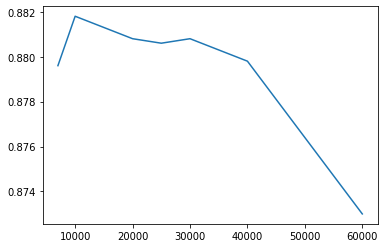

In [34]:
import matplotlib.pyplot as plt

plt.plot(k_array, k_accuracy)
plt.show()

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB

m = SelectFromModel(MultinomialNB())
m.fit(X_train, y_train)
print(X_train.shape)
X_train = m.transform(X_train)
X_test = m.transform(X_test)

X_train.shape


# 0.678

(20000, 74849)


(20000, 45293)

In [35]:
from sklearn.naive_bayes import MultinomialNB

# MultinomialNB - 0.86
# KNeighborsClassifier - 0.76
# DecisionTreeClassifier - 0.68
# RandomForestClassifier - 0.50
# AdaBoostClassifier - 0.7966
# QuadraticDiscriminantAnalysis - memory error
# GaussianNB - memory error

clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
from sklearn.metrics import accuracy_score

predicted = clf.predict(X_test)

#accuracy - 0.86
#with feature selection accuracy - 0.69
accuracy_score(y_test, predicted)

0.892

In [37]:
predicted

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)